In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [33]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

plt.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [34]:
df = pd.read_csv('시군구_출생아수__합계출산율_20240627002952.csv', encoding='cp949')
df

,시점,구미시,구미시.1
0,시점,출생아수,합계출산율
1,2011,5079,1.418
2,2012,5386,1.510
3,2013,4790,1.368
4,2014,4917,1.438
5,2015,4760,1.440
6,2016,4286,1.343
7,2017,3727,1.201
8,2018,3360,1.110
9,2019,2891,0.984


In [35]:
print(df.iloc[13])

시점       2023 p)
구미시         1900
구미시.1      0.710
Name: 13, dtype: object


In [36]:
print(df.iloc[13]['시점'])
print(type(df.iloc[13]['시점']))

2023 p)
<class 'str'>


In [37]:
print(df.iloc[13, 0])
print(type(df.iloc[13, 0]))

2023 p)
<class 'str'>


In [38]:
#    012345
a = '2023 p)'
print(a)
print(a[0:4])  # 0번지 에서 4번지 전 까지

2023 p)
2023


In [39]:
# 13번 행
# print(df.iloc[13]['시점'][0:4])
print(df.iloc[13, 0])

2023 p)


In [40]:
# 13번 행 데이터 수정
# df.iloc[13]['시점'] = df.iloc[13]['시점'][0:4]
df.iloc[13, 0] = df.iloc[13]['시점'][0:4]

In [41]:
df

,시점,구미시,구미시.1
0,시점,출생아수,합계출산율
1,2011,5079,1.418
2,2012,5386,1.510
3,2013,4790,1.368
4,2014,4917,1.438
5,2015,4760,1.440
6,2016,4286,1.343
7,2017,3727,1.201
8,2018,3360,1.110
9,2019,2891,0.984


In [42]:
year = df['시점'][1:].astype(int).to_list()
print(year)

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [43]:
birth = df['구미시'][1:].astype(int).to_list()
print(birth)

[5079, 5386, 4790, 4917, 4760, 4286, 3727, 3360, 2891, 2695, 2409, 2201, 1900]


In [44]:
rate = df['구미시.1'][1:].astype(float).to_list()
print(rate)

[1.418, 1.51, 1.368, 1.438, 1.44, 1.343, 1.201, 1.11, 0.984, 0.944, 0.872, 0.818, 0.71]


In [45]:
new_df = pd.DataFrame(
    {
        '년도': year,
        '출생아수': birth,
        '합계출산율': rate
	}
)

new_df

,년도,출생아수,합계출산율
0,2011,5079,1.418
1,2012,5386,1.510
2,2013,4790,1.368
3,2014,4917,1.438
4,2015,4760,1.440
5,2016,4286,1.343
6,2017,3727,1.201
7,2018,3360,1.110
8,2019,2891,0.984
9,2020,2695,0.944


In [46]:
for i in range(0, len(new_df.index), 1):
    print(int(new_df.iloc[i]['출생아수']))

5079
5386
4790
4917
4760
4286
3727
3360
2891
2695
2409
2201
1900


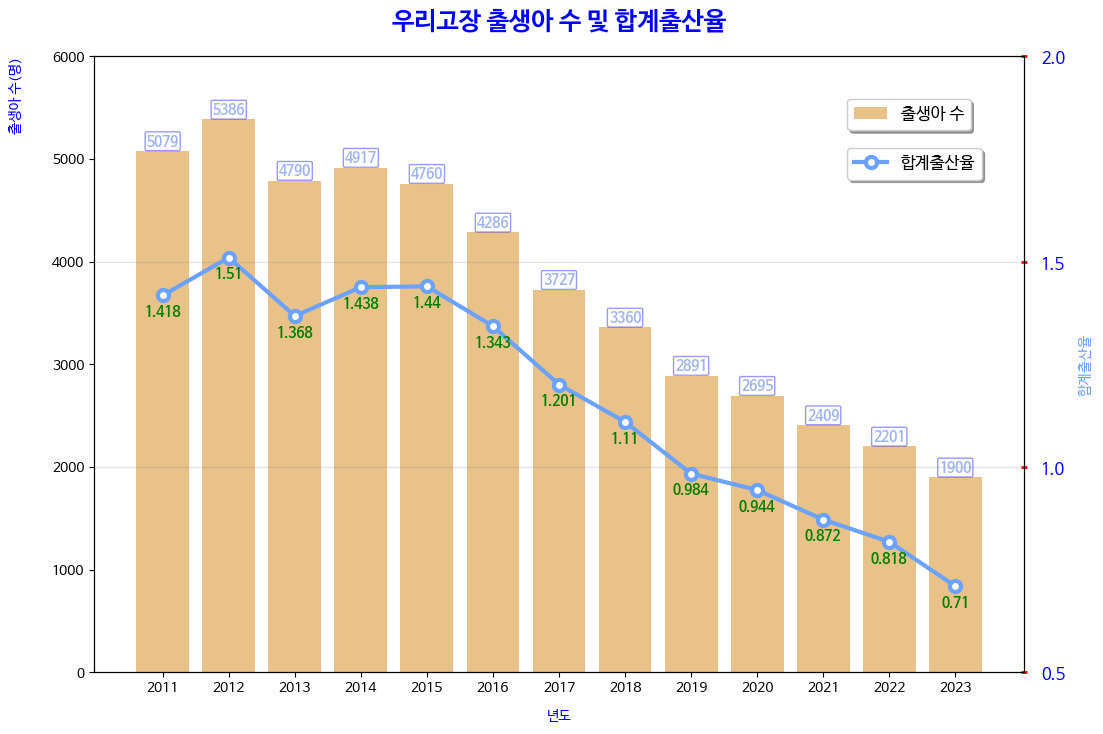

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(new_df['년도'], new_df['출생아수'], color='#E8C288', label='출생아 수')

for i in range(0, len(new_df.index), 1):
    ax.text(
            new_df.iloc[i]['년도'], int(new_df.iloc[i]['출생아수']+95), int(new_df.iloc[i]['출생아수']),
            fontsize=10,                    # 글씨 크기
            color='royalblue',              # 글씨 색깔
            fontweight='bold',              # 굵게
            backgroundcolor='lightgray',    # 밝은 회색 배경 색
            alpha=0.5,                      # 0.5 투명도
            va='center',                    # 세로축 정렬: top, bottom, center
            ha='center',                    # 가로축 정렬: left, right, center
            rotation='horizontal',          # 회전: vertical, horizontal
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.1)
        )

ax.set_xlabel('년도', labelpad=10, loc='center', color='blue')
ax.set_ylabel('출생아 수(명)', labelpad=20, loc='top', color='blue')

ax.set_xticks(np.arange(2011, 2024, 1))
ax.set_yticks(np.arange(0, 7000, 1000))

ax.legend(loc=(0.81, 0.88), fontsize=12, shadow=True)

# x축을 공유하는 axis를 만든다
ax2 = ax.twinx()

ax2.plot(
    new_df['년도'], new_df['합계출산율'],
	  color='#6BA1FF',
    marker='o',
    markersize=8,
    markeredgecolor='#6BA1FF',
    markerfacecolor='white',
	  markeredgewidth='3',
	  linewidth=3,
    label='합계출산율'
)

for i in range(0, len(new_df.index), 1):
    ax2.text(new_df.iloc[i]['년도'], new_df.iloc[i]['합계출산율']-0.04, new_df.iloc[i]['합계출산율'],
             fontsize=10,
             color='green',
             fontweight='bold',
             va='center',
             ha='center'
            )

ax2.set_yticks(np.arange(0.5, 2.5, 0.5))
ax2.set_ylabel('합계출산율', labelpad=10, loc='center', color='#6BA1FF')
ax2.legend(loc=(0.81, 0.8), fontsize=12, shadow=True)
ax2.tick_params(axis='y',  direction='inout', length=5, pad=10, labelsize=12, labelcolor='blue', width=2, color='red')

plt.grid(True, axis='y', color='gray', alpha=0.2, linestyle='-', linewidth=1)

plt.title('우리고장 출생아 수 및 합계출산율', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()